In [78]:
import pandas as pd
from pandas.core.indexes.base import Index
import matplotlib
from tabulate import tabulate
import os
import datetime
from xlsxwriter import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#location of all essential csv files
home = '/Users/birajaryal/virtual_workspace/vegetables'
os.chdir(home)
print(home)
os.chdir('daily')
today = datetime.date.today().strftime("%Y-%m-%d")
yesterday = (datetime.date.today() - datetime.timedelta(1)).strftime("%Y-%m-%d")
today_file = f'kalimati_{today}.csv'
yesterday_file = f'kalimati_{yesterday}.csv'
today_df = pd.read_csv(today_file)
yesterday_df = pd.read_csv(yesterday_file)

# removing nepali name column from the dataframe: ADD THIS COLUMN LATER along with others below when needed
nepali_name = list(today_df['Nepali Name'])
maximum = list(today_df['Maximum Price (Rs.)'])  
minimum = list(today_df['Minimum Price (Rs.)']) 
# del today_df['Nepali Name']
del today_df['Minimum Price (Rs.)']
del today_df['Maximum Price (Rs.)']

yesterday_nepali_name = list(yesterday_df['Nepali Name'])
yesterday_maximum = list(yesterday_df['Maximum Price (Rs.)'])  
yesterday_minimum = list(yesterday_df['Minimum Price (Rs.)']) 
del yesterday_df['Nepali Name']
del yesterday_df['Minimum Price (Rs.)']
del yesterday_df['Maximum Price (Rs.)']


# Total Number of vegetables today
vegetable_count = today_df.shape[0]

# Average Price of vegetables/fruits per kg/Pc/Doz [Avergae Kalimati Price]---VISUALIZATION REMAINING
today_df['Average Kalimati Price (Rs.)'] = today_df['Average Price (Rs.)'].mean() # plot a single graph of this comparing with the one below
yesterday_df['Average Kalimati Price (Rs.)'] = yesterday_df['Average Price (Rs.)'].mean() # plot a single graph of this comparing with the one above


                                        # PART 1: Intraday
# Relatively Cheap
below_avg_price = today_df['Average Price (Rs.)'] < today_df['Average Kalimati Price (Rs.)']
cheap_df = today_df[below_avg_price].sort_values('Average Price (Rs.)')
cheap_df['Less than Average Kalimati Price by (Rs.)'] = round(cheap_df['Average Kalimati Price (Rs.)'] - cheap_df['Average Price (Rs.)'], 2)
del cheap_df['Average Kalimati Price (Rs.)']
# print(cheap_df)


# Relatviely Expensive
above_avg_price = today_df['Average Price (Rs.)'] > today_df['Average Kalimati Price (Rs.)']
expensive_df = today_df[above_avg_price].sort_values('Average Price (Rs.)', ascending=False)
expensive_df['More than Average Kalimati Price by (Rs.)'] = round(expensive_df['Average Price (Rs.)'] - expensive_df['Average Kalimati Price (Rs.)'], 2)
del expensive_df['Average Kalimati Price (Rs.)']
# print(expensive_df)


                                    # PART 2: Interday
with_yesterday_df = pd.merge(today_df, yesterday_df, on='English Name')
del with_yesterday_df['Unit_x']
del with_yesterday_df['Unit_y']
with_yesterday_df['Change in Average Price (Rs.)'] = with_yesterday_df['Average Price (Rs.)_x'] - with_yesterday_df['Average Price (Rs.)_y']
with_yesterday_df['Change in Average Price (%)'] =  round(with_yesterday_df['Change in Average Price (Rs.)']/with_yesterday_df['Average Price (Rs.)_y'] * 100, 2)
del with_yesterday_df['Average Kalimati Price (Rs.)_x']
del with_yesterday_df['Average Kalimati Price (Rs.)_y']


# All Positive Change in Price
positive_change = with_yesterday_df['Average Price (Rs.)_x'] > with_yesterday_df['Average Price (Rs.)_y']
top_positive_change = with_yesterday_df[positive_change].sort_values('Change in Average Price (%)', ascending=False)
top_positive_change = top_positive_change.rename(columns={'Average Price (Rs.)_x': "Average Price (Rs.)"})
del top_positive_change['Average Price (Rs.)_y']
# print(top_positive_change)


# All Negative Change in Price
negative_change = with_yesterday_df['Average Price (Rs.)_x'] < with_yesterday_df['Average Price (Rs.)_y']
top_negative_change = with_yesterday_df[negative_change].sort_values('Change in Average Price (%)')
top_negative_change = top_negative_change.rename(columns={'Average Price (Rs.)_x': "Average Price (Rs.)"})
del top_negative_change['Average Price (Rs.)_y']
# print(top_negative_change)


# Change in Average kalimati Price - - CONSOLE ONLY
change_in_avg_kalimati_price = today_df['Average Price (Rs.)'].mean() - yesterday_df['Average Price (Rs.)'].mean()
percent_change = change_in_avg_kalimati_price.item()/yesterday_df['Average Price (Rs.)'].mean()*100
print("Today's Average Kalimati Price is Rs.", round(today_df['Average Price (Rs.)'].mean(), 2))
print("Last day's Average Kalimati Price was Rs.",round(yesterday_df['Average Price (Rs.)'].mean(), 2))
if change_in_avg_kalimati_price.item() < 0:  # although not needed here, .item() converts numpy type to python type
    print('Average kalimati Price decreased by Rs.', str(round(change_in_avg_kalimati_price, 2)))
    print("Average kalimati Price decreased by: ", str(round(percent_change,2)), '%')
elif change_in_avg_kalimati_price.item() > 0:  # although not needed here, .item() converts numpy type to python type
    print('Average kalimati Price increased by Rs.', str(round(change_in_avg_kalimati_price, 2)))
    print("Average kalimati Price increased by:", str(round(percent_change,2)), '%')

# plt.figure(figsize=(12,6))
# plt.title('Prices compared to Average Kamilati Price')
# sns.scatterplot('Average Kalimati Price (Rs.)',
#                'Average Price (Rs.)',
#                 hue='English Name',
#                data=today_df);

fig = px.histogram(today_df, x="Average Price (Rs.)", color='English Name',
                title='Prices compared to Average Kamilati Price')
fig.show()


# Test Plot
# print(tabulate(today_df, headers='keys', tablefmt='psql'))

/Users/birajaryal/virtual_workspace/vegetables
Today's Average Kalimati Price is Rs. 146.9
Last day's Average Kalimati Price was Rs. 135.39
Average kalimati Price increased by Rs. 11.51
Average kalimati Price increased by: 8.5 %


<AxesSubplot:>

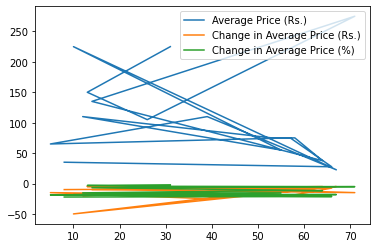